<a href="https://colab.research.google.com/github/eko-andri-prasetyo/penerapan-data-science/blob/main/notebook_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Eko Andri Prasetyo
- Email: eko.andri@prasetyo.co
- Id Dicoding: ekoandriprasetyo

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import os
import json
import sqlite3
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import joblib

sns.set_theme()

from IPython.display import display
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


### Menyiapkan data yang akan diguankan

## Data Understanding

Shape: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                        

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0



Missing values (top 10):


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0



Target distribution:


,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Duplicate rows: 0


,0
Marital_status,int64
Application_mode,int64
Application_order,int64
Course,int64
Daytime_evening_attendance,int64
Previous_qualification,int64
Previous_qualification_grade,float64
Nacionality,int64
Mothers_qualification,int64
Fathers_qualification,int64


,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


,proportion
Status,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


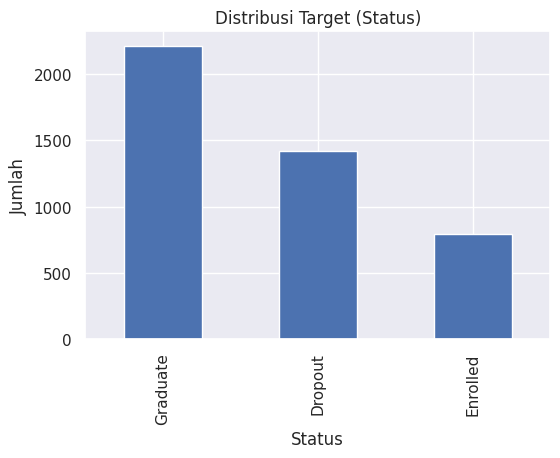

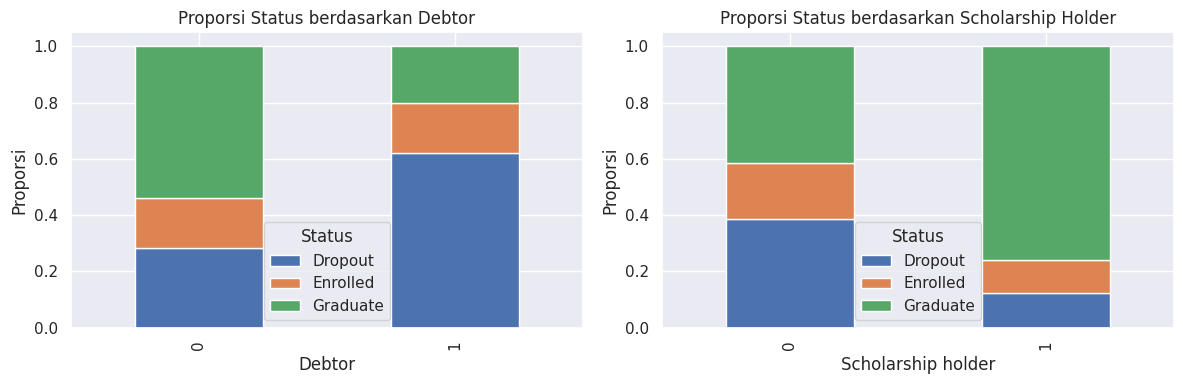

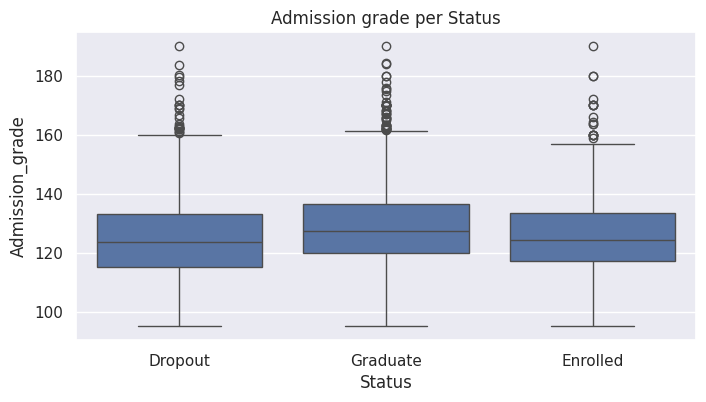

,feature,outlier_count
18,Scholarship_holder,1099
31,Curricular_units_2nd_sem_grade,877
25,Curricular_units_1st_sem_grade,726
5,Previous_qualification,707
21,Curricular_units_1st_sem_credited,577
2,Application_order,541
27,Curricular_units_2nd_sem_credited,530
16,Tuition_fees_up_to_date,528
0,Marital_status,505
15,Debtor,503


In [2]:
# Load data
DATA_PATH = "data/data.csv"

# Dataset menggunakan separator ';'
df = pd.read_csv(DATA_PATH, sep=';')

print("Shape:", df.shape)
df.head()

# Basic checks
display(df.info())
display(df.describe(include='all').T.head(10))

print("\nMissing values (top 10):")
display(df.isna().sum().sort_values(ascending=False).head(10))

print("\nTarget distribution:")
display(df['Status'].value_counts())

# Cek data duplikat
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

# Cek tipe data & ringkasan sederhana
display(df.dtypes)

# Cek distribusi target (jumlah & proporsi)
display(df['Status'].value_counts())
display(df['Status'].value_counts(normalize=True).rename('proportion'))

# --- EDA ringkas ---
# Distribusi target
plt.figure(figsize=(6,4))
df['Status'].value_counts().plot(kind='bar')
plt.title("Distribusi Target (Status)")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()

# Contoh: Status vs Debtor / Scholarship holder
fig, ax = plt.subplots(1, 2, figsize=(12,4))

pd.crosstab(df['Debtor'], df['Status'], normalize='index').plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title("Proporsi Status berdasarkan Debtor")
ax[0].set_xlabel("Debtor")
ax[0].set_ylabel("Proporsi")

pd.crosstab(df['Scholarship_holder'], df['Status'], normalize='index').plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title("Proporsi Status berdasarkan Scholarship Holder")
ax[1].set_xlabel("Scholarship holder")
ax[1].set_ylabel("Proporsi")

plt.tight_layout()
plt.show()

# Admission grade per status
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Status', y='Admission_grade')
plt.title("Admission grade per Status")
plt.show()

# --- Deteksi outlier (IQR) ringkas ---
import numpy as np

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

outlier_counts = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cnt = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts.append((col, int(cnt)))

outlier_df = pd.DataFrame(outlier_counts, columns=["feature", "outlier_count"]).sort_values("outlier_count", ascending=False)
display(outlier_df.head(15))

## Data Preparation / Preprocessing

In [3]:
# --- Data Preparation / Preprocessing ---

TARGET = "Status"
X = df.drop(columns=[TARGET])
y = df[TARGET]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

# Pisahkan fitur numerik & kategorikal (jaga-jaga jika ada kolom non-numerik)
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

print("Numeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

Train: (3539, 36) Test: (885, 36)
Numeric features: 36
Categorical features: 0


## Modeling

In [4]:
# --- Modeling ---

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=3000,
    class_weight="balanced",
    solver="lbfgs",
    multi_class="auto"
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model),
])

pipe.fit(X_train, y_train)

print("Model trained. Classes:", list(pipe.named_steps["model"].classes_))

Model trained. Classes: ['Dropout', 'Enrolled', 'Graduate']


## Evaluation

Accuracy: 0.7288135593220338
Macro F1 : 0.6927419987702371

Classification report:
              precision    recall  f1-score   support

     Dropout     0.8472    0.6831    0.7563       284
    Enrolled     0.4080    0.6415    0.4988       159
    Graduate     0.8596    0.7896    0.8231       442

    accuracy                         0.7288       885
   macro avg     0.7049    0.7047    0.6927       885
weighted avg     0.7745    0.7288    0.7434       885



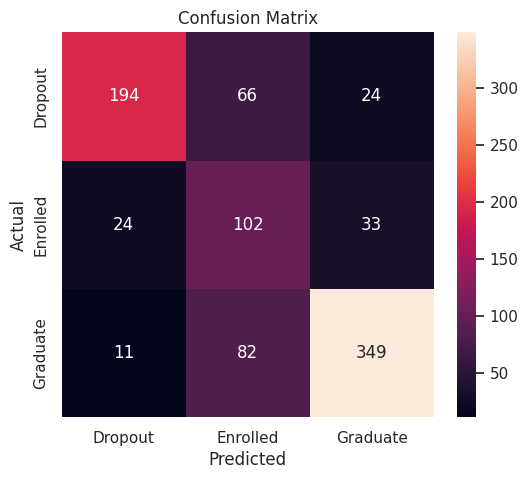

Saved: model/model.joblib
Saved: model/schema.json
Saved: model/metrics.json
SQLite DB saved to: /content/dashboard/students.db


In [5]:
# --- Evaluation ---

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

pred = pipe.predict(X_test)

acc = accuracy_score(y_test, pred)
f1m = f1_score(y_test, pred, average="macro")

print("Accuracy:", acc)
print("Macro F1 :", f1m)
print("\nClassification report:")
print(classification_report(y_test, pred, digits=4))

cm = confusion_matrix(y_test, pred, labels=pipe.named_steps["model"].classes_)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=pipe.named_steps["model"].classes_,
    yticklabels=pipe.named_steps["model"].classes_
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Simpan model + artefak untuk prototipe (Streamlit) ---

out_model_dir = Path("model")
out_model_dir.mkdir(exist_ok=True)

joblib.dump(pipe, out_model_dir / "model.joblib")

# Schema sederhana (untuk validasi input di app)
schema = {
    "target": TARGET,
    "classes": list(pipe.named_steps["model"].classes_),
    "features": []
}

for col in X.columns:
    s = X[col]
    info = {"name": col, "dtype": str(s.dtype)}

    if pd.api.types.is_numeric_dtype(s):
        info["type"] = "numeric"
        # gunakan nan-safe supaya aman
        info["min"] = float(np.nanmin(s.to_numpy()))
        info["max"] = float(np.nanmax(s.to_numpy()))
        info["median"] = float(np.nanmedian(s.to_numpy()))
    else:
        info["type"] = "categorical"
        cats = [x for x in s.dropna().unique().tolist()]
        # batasi agar tidak terlalu besar
        info["categories"] = sorted(cats)[:100]

    schema["features"].append(info)

(out_model_dir / "schema.json").write_text(json.dumps(schema, indent=2), encoding="utf-8")

metrics = {"accuracy": float(acc), "macro_f1": float(f1m)}
(out_model_dir / "metrics.json").write_text(json.dumps(metrics, indent=2), encoding="utf-8")

print("Saved:", out_model_dir / "model.joblib")
print("Saved:", out_model_dir / "schema.json")
print("Saved:", out_model_dir / "metrics.json")

# --- (Opsional) Buat SQLite untuk Metabase dashboard ---

db_dir = Path("dashboard")
db_dir.mkdir(exist_ok=True)
db_path = db_dir / "students.db"

if db_path.exists():
    db_path.unlink()

conn = sqlite3.connect(db_path)
df.to_sql("students", conn, index=False)
conn.close()

print("SQLite DB saved to:", db_path.resolve())